# **CS 1810 Homework 1**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever you use to run your code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary but can help prevent any issues due to package versions.

**The following notebook is meant to help you work through Problems 1, 3, and 4 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [1]:
# Loading data
import numpy as np
import matplotlib.pyplot as plt

train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]

# Problem 1

## Problem 1 Subpart 1(a)

In [2]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_new = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """

    # Compute distances, shape is (n, m) where n is the number of test points and m is the number of training points
    dists = np.abs(x_train.reshape(1,-1) - x_new.reshape(-1,1))
    # Argsort the rows
    ix = dists.argsort(axis = 1)
    ix = ix[:, :k] # take only the k smallest distances
    y = y_train[ix]

    # sum each row
    return np.mean(y, axis = 1)

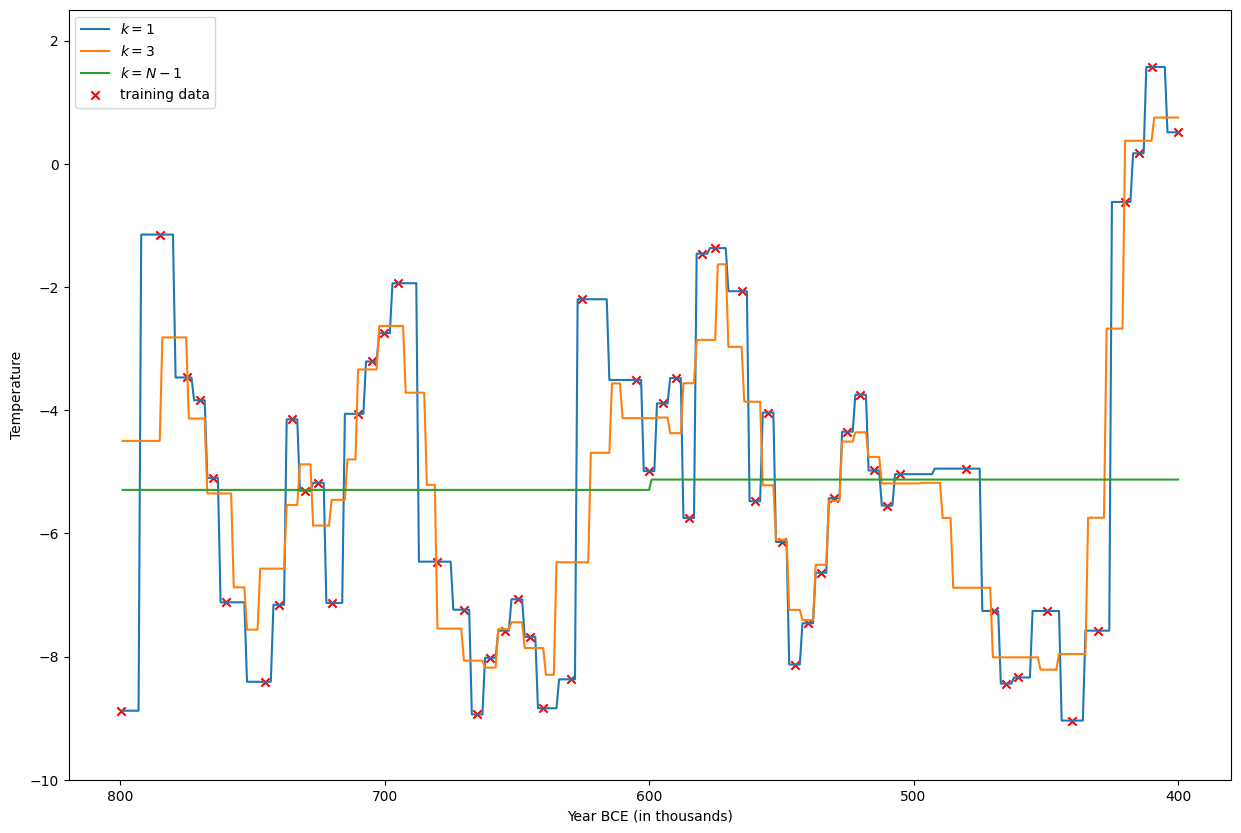

In [3]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.figure(figsize=(15,10))
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red", marker="x")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("img_output/p1.1a.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 1(b)

In [32]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    return np.mean((predictions - true)**2)

In [208]:
for k in [1,3,N-1]:
    mse = model_mse(
        predict_knn( year_test, k, year_train, temp_train ),
        temp_test
    )
    print(f"MSE for k={k} is {mse}")

MSE for k=1 is 1.7406000000000004
MSE for k=3 is 3.8907662222222212
MSE for k=56 is 9.528571442602042


## Problem 1 Subpart 2(a)

In [78]:
def kernel(x, x_prime, tau):
    return np.exp( -(x - x_prime)**2 / tau )

def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_new.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param y_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_new = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    train = list(zip(x_train, y_train))
    def f(x_star):
        return np.sum( [kernel(x, x_star, tau) * y for (x,y) in train] ) / \
                np.sum( [kernel(x, x_star, tau) for x in x_train] )

    return np.vectorize(f)(x_new)

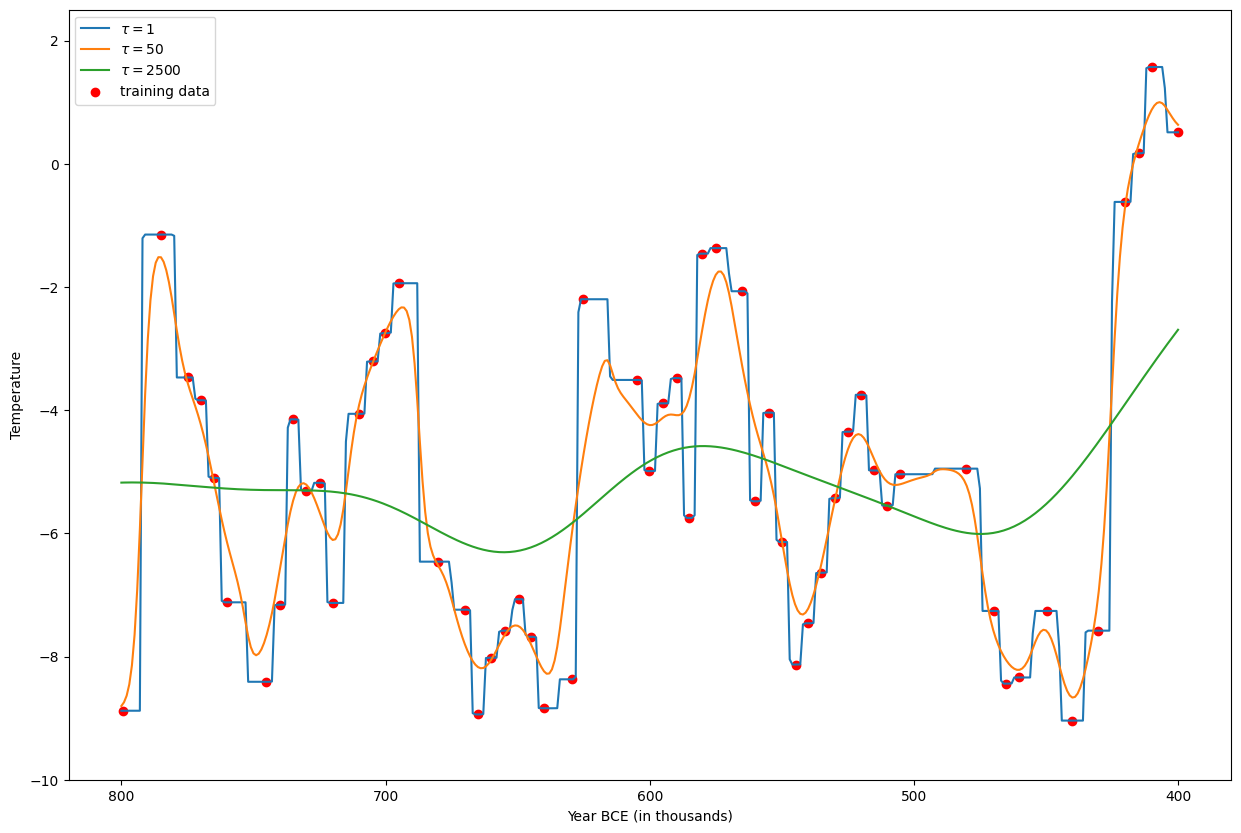

In [81]:
# Plot functions
plt.figure(figsize=(15,10))
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.2.png
plt.savefig("img_output/p1.2a.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 2(c)

In [102]:
# Compute the MSEs for different values of tau
tau_list = [1, 50, 2500]
for tau in tau_list:
    print(
        "Tau =", tau,
        "\nModel MSE =", 
        model_mse(
            kernel_regressor( year_test, tau, year_train, temp_train ),
            temp_test
        )
    )

Tau = 1 
Model MSE = 1.9472621565209178
Tau = 50 
Model MSE = 1.8582899169613447
Tau = 2500 
Model MSE = 8.333886806980791


# Problem 3

## Problem 3 Subpart 1

In [118]:
def exp_kernel(x,mu):
    return np.exp(-1/float(5)*np.power(x-mu,2))

def f_scale(X, part="a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X

# specifications. The function should return the array `phi(X)`
def make_basis(X,part="a"):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section

  N = X.size
  phi_X = np.ones(N)
  if part=="a":
    for j in range(1,10):
      phi_X = np.column_stack([phi_X, X**j])
  elif part=="b":
    for j in range(1,10):
      mu_j = (j+7)/8
      phi_X = np.column_stack([phi_X, exp_kernel(X,mu_j)])
  elif part=="c":
    for j in range(1,10):
      phi_X = np.column_stack([phi_X, np.cos(X/j)])
  elif part=="d":
    for j in range(1,50):
      phi_X = np.column_stack([phi_X, np.cos(X/j)])
  return phi_X

We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [119]:
# Helper function to find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

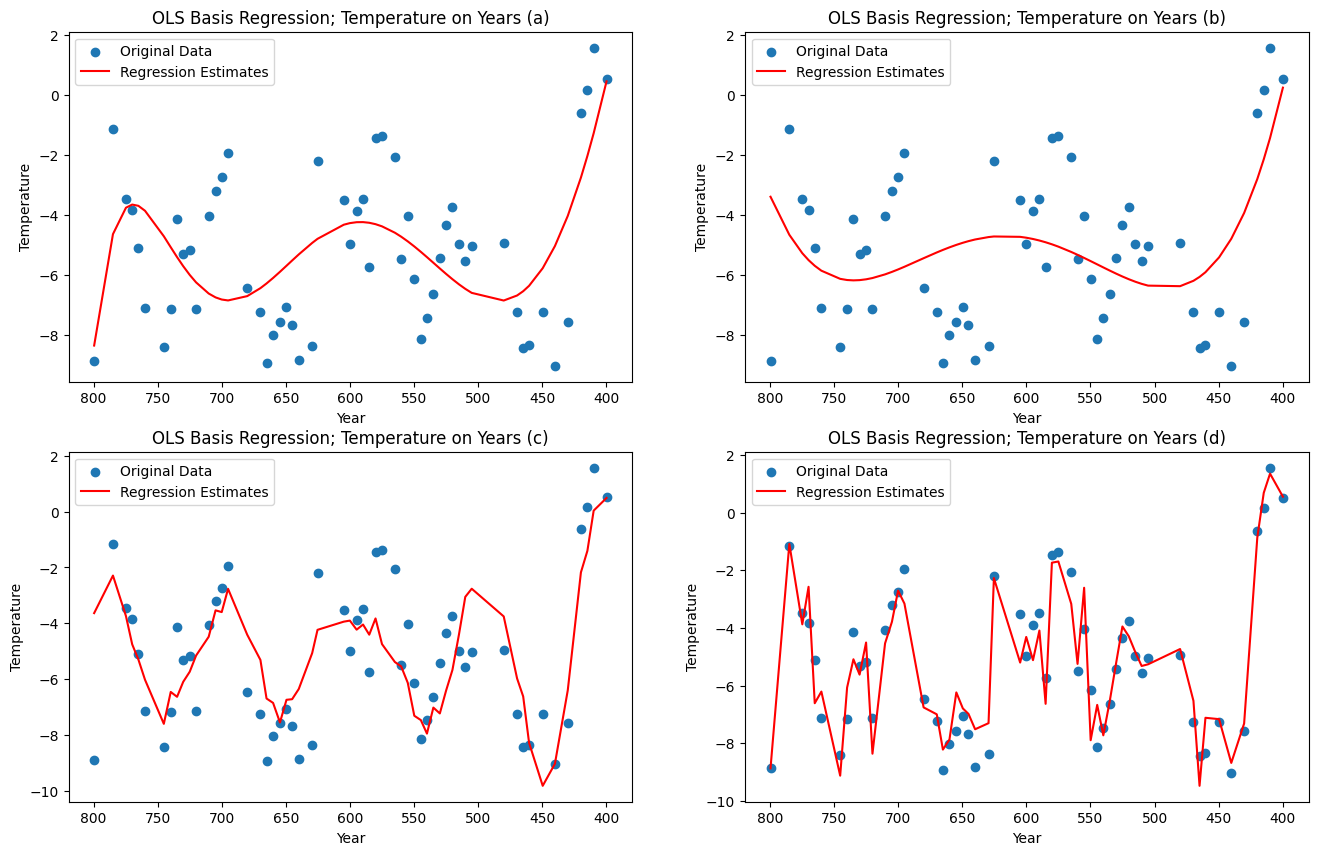

In [154]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  phi_years_train = make_basis(year_train, part)
  w = find_weights(phi_years_train, temp_train)

  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  
  xs = np.linspace(year_train.min(), year_train.max(), 1000)
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")

  # plot estimates based on regression
  ax[i//2, i%2].plot(year_train, phi_years_train @ w, label="Regression Estimates", color="red")

  ax[i//2, i%2].legend()
  
  ax[i//2, i%2].invert_xaxis()
  
plt.savefig("img_output/p3.1.png")

## Problem 3 Subpart 2

In [149]:
# Compute the MSE for each basis
for basis in ["a","b","c","d"]:
    phi_years_train = make_basis(year_train, basis)
    phi_years_test = make_basis(year_test, basis)
    w = find_weights(phi_years_train, temp_train)
    print("Basis", basis, "MSE =", model_mse(phi_years_test @ w, temp_test))

Basis a MSE = 7.955766118350291
Basis b MSE = 8.708149140407475
Basis c MSE = 5.967024534016807
Basis d MSE = 58.9470676881961


# Problem 4

## Problem 4 Subpart 5

In [198]:
def find_lasso_weights(lam, X, y):
    """
    Fit the weights of a LASSO linear regression through the coordinate descent algorithm.

    :param lam: the lambda parameter
    :param X: the design matrix with training set features
    :param y: the training set labels
    :return: the fitted weights
    """
    MAX_ITER = 5000

    N,D = X.shape
    # w = w_0
    w = np.ones(D)
    ct = 0
    for _ in range(MAX_ITER):
        for d in range(1,D+1):
            x_d = X[:, d-1] # d-1 b/c of 0-indexing
            w_d = w[d-1]
            rho_d =  x_d.T @ ( y - (X @ w - w_d * x_d) )
            if d==1:
                w[d-1] = rho_d / (x_d.T @ x_d)
            else:
                w[d-1] = np.sign(rho_d) * max(np.abs(rho_d)-lam/2, 0) / (x_d.T @ x_d)
    return w

In [175]:
# Helper function for standardizing inputs to LASSO
def preprocess_lasso(X):
    X = make_basis(X, part='d')
    X[:, 1:] = (X[:, 1:] - X[:, 1:].mean(axis = 0)) / X[:, 1:].std(axis = 0)
    return X

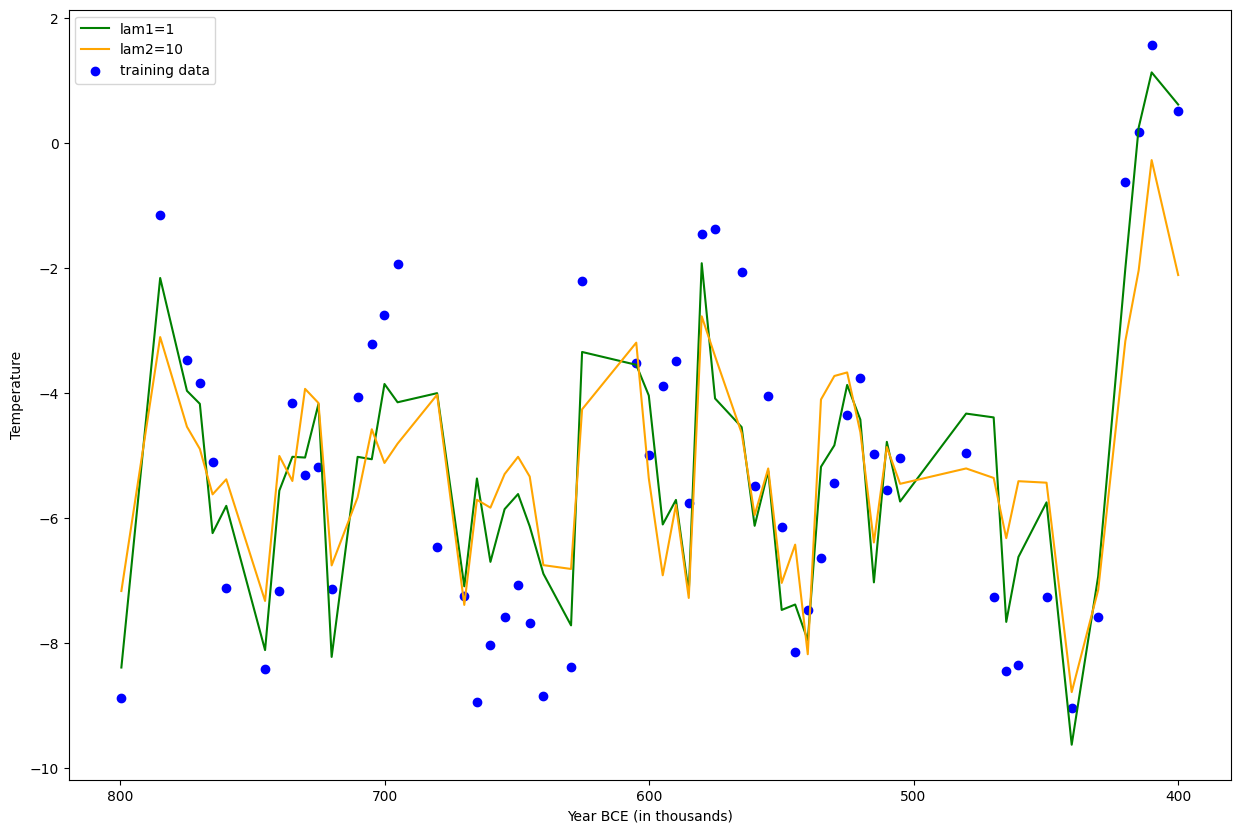

In [205]:
# Fit the weights for both models
phi_x_train = preprocess_lasso(year_train)
lam1, lam2 = 1, 10

w1 = find_lasso_weights(lam1, phi_x_train, temp_train)
w2 = find_lasso_weights(lam2, phi_x_train, temp_train)

# Plot functions
x_array = np.arange(400, 800 + 1, 1)
phi_x_array = preprocess_lasso(x_array)

plt.figure(figsize=(15,10))

# plot regression line
plt.plot(year_train, phi_x_train @ w1, label="lam1=1", color="green")
plt.plot(year_train, phi_x_train @ w2, label="lam2=10", color="orange")

plt.scatter(year_train, temp_train, label = "training data", color = "blue")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p4.5.png
plt.savefig("img_output/p4.5.png", bbox_inches = "tight")
plt.show()

In [206]:
# Compute the MSE for both values of lambda
# use test set
phi_x_test = preprocess_lasso(year_test)
mse1 = model_mse(phi_x_test @ w1, temp_test)
mse2 = model_mse(phi_x_test @ w2, temp_test)

print("MSE for lambda=1:", mse1)
print("MSE for lambda=10:", mse2)

MSE for lambda=1: 30.06059712335644
MSE for lambda=10: 15.618355559963952
